<ipython-input-16-be9c5a0f8698>:18: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  img = librosa.display.specshow(stft, y_axis='linear', x_axis='time', ax=ax)


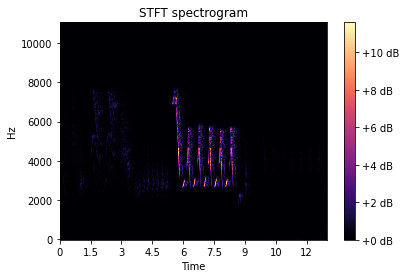

In [16]:
import librosa
import soundfile
import numpy as np
import scipy
import matplotlib.pyplot as plt
from librosa import feature
from librosa import display
from torchaudio.transforms import Resample
import torch

bird = 'audio_16k/bird-sing.wav'
bird_sing, sr = librosa.load(bird)

# Place your code for this part here
stft = librosa.stft(bird_sing, n_fft=512)
#plot
fig, ax = plt.subplots()
img = librosa.display.specshow(stft, y_axis='linear', x_axis='time', ax=ax)
ax.set_title('STFT spectrogram')
fig.colorbar(img, ax=ax, format="%+2.0f dB")

[Text(0.5, 1.0, 'Mel-frequency spectrogram')]

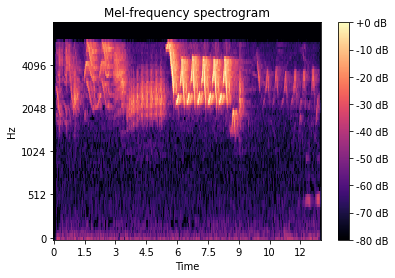

In [17]:
melspectrogram = feature.melspectrogram(y=bird_sing, n_fft=512,hop_length=128,n_mels = 80)
fig, ax = plt.subplots()

S_dB = librosa.power_to_db(melspectrogram, ref=np.max)
img = display.specshow(S_dB, x_axis='time',
                         y_axis='mel', sr=sr,
                         fmax=8000, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency spectrogram')

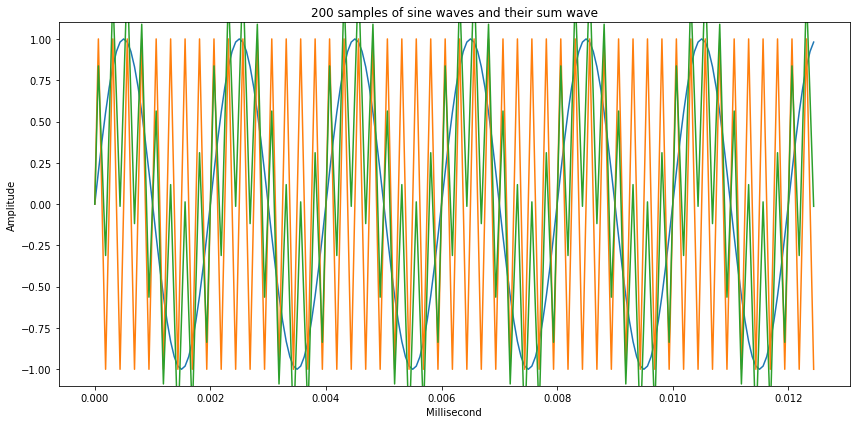

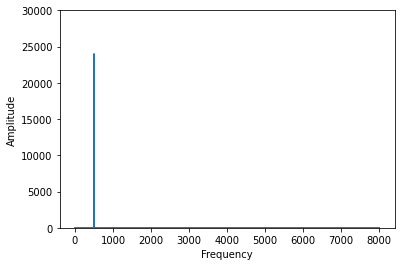

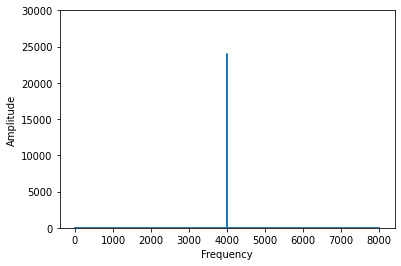

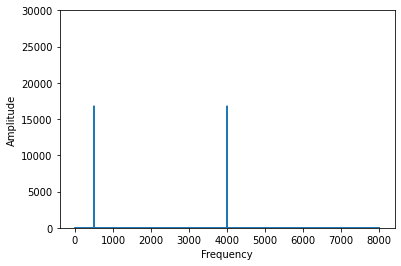

In [18]:
def create_sine_k_N(k, N):
    return np.sin((2 * np.pi * k / N) * np.arange(N))


t = 3  # seconds length
fs = 16000  #frequency sampling
N = t * fs  #  total number of samples in the signal
frequency1 = 500  # 500[Hz]
frequency2 = 4000  # 40[KHz]

################### Part B1,B2,B3 ###################
alpha = 0.7
num_components = 3
signals = np.zeros((num_components, N))
signals[0] = create_sine_k_N(k=frequency1 * t, N=N)
signals[1] = create_sine_k_N(k=frequency2 * t, N=N)
signals[2] = alpha * signals[0] + alpha * signals[1]

x_vals = np.arange(200) / fs

fig, ax = plt.subplots(nrows=1, sharex=True, figsize=(12, 6))
for signal in signals:
    ax.plot(x_vals, signal[:200])
    ax.set_ylim((-1.1, 1.1))
    ax.set_title('200 samples of sine waves and their sum wave')
    ax.set_ylabel("Amplitude")
    ax.set_xlabel("Millisecond")
    plt.tight_layout()
plt.show()

################### Part B4 ###################
for i, signal in enumerate(signals):
    fft_x = np.fft.fft(signal)
    # plt.plot(np.arange(N)/ t, abs(fft_x))
    plt.plot(np.arange(N / 2) / t, abs(fft_x)[:int((N) / 2)])  #plot only frequencys in range
    plt.ylim((-5, 30000))
    plt.xlabel("Frequency")
    plt.ylabel("Amplitude")
    plt.show()

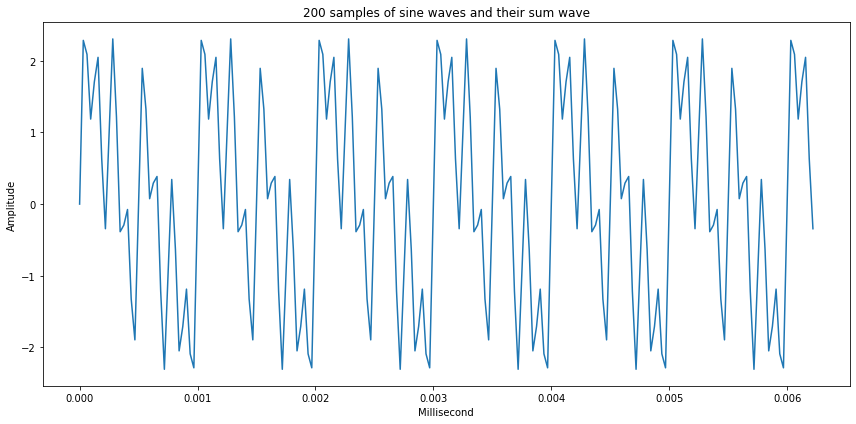

96000


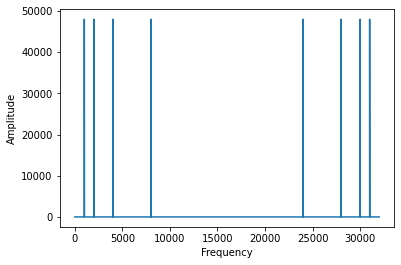

24000


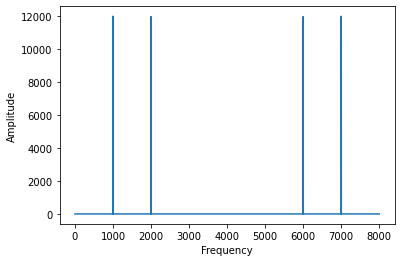

96000


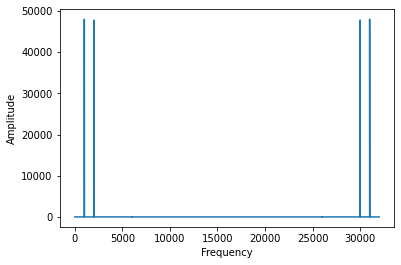

48000


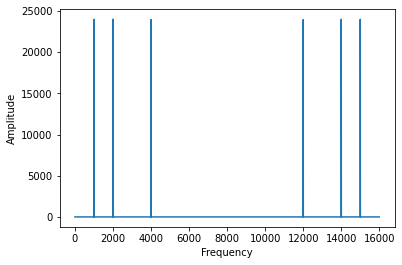

96000


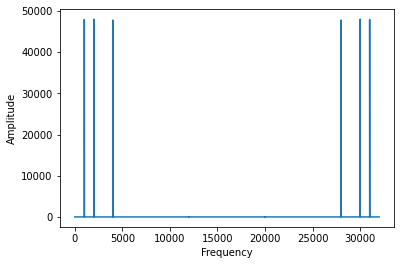

In [19]:

################### Part C1 ###################

t = 3 # seconds length
fs = 32000 # frequency sampling
N = t * fs #  total number of samples in the signal
frequency = 1000 # 32[KHz]
signals = []

for i  in range(5):
    signals.append(create_sine_k_N(k=(2 ** i) * frequency * t,N=N))

cascaded_sine = np.sum(signals, axis=0) # sum all signals
x_vals = np.arange(200)  / fs

fig, ax  = plt.subplots(nrows=1, sharex=True, figsize=(12,6))
ax.plot(x_vals, cascaded_sine[:200])
ax.set_title('200 samples of sine waves and their sum wave')
ax.set_ylabel("Amplitude")
ax.set_xlabel("Millisecond")
plt.tight_layout()
plt.show()

################### Part C2 ###################
def resample(signal, new_fs, old_fs):
    resample_transform = Resample(orig_freq=old_fs, new_freq=new_fs)
    down_sampled_signal = resample_transform(signal)
    return down_sampled_signal

################### Part C3 ###################
tensor_cascaded_sine = torch.from_numpy(cascaded_sine).float()

signal_16khz = resample(signal=tensor_cascaded_sine,new_fs=16000,old_fs=32000)
signal_8khz = resample(signal=tensor_cascaded_sine,new_fs=8000,old_fs=32000)

################### Part C4 ###################
re_signal_16khz = resample(signal=signal_16khz,new_fs=32000,old_fs=16000)
re_signal_8khz = resample(signal=signal_8khz,new_fs=32000,old_fs=8000)
signals = [cascaded_sine,signal_8khz, re_signal_8khz,signal_16khz, re_signal_16khz]

# 48,24,6,96
################### Part C5 ###################
for i,signal in enumerate(signals):
    print(len(signal))
    fft_signal = np.fft.fft(signal)
    plt.plot(np.arange(len(fft_signal))/ t , abs(fft_signal)[:int((len(fft_signal)))])
    # plt.ylim((-5, 30000))
    plt.xlabel("Frequency")
    plt.ylabel("Amplitude")
    plt.show()

In [20]:
# Place your code for this part here
################### Part D5 ###################

arr = np.array([0.49913293, 0.499082, 0.4996634, 0.49963063, 0.49965274, 0.4988215, 0.49992466, 0.4995301,
       0.49949634, 0.49929857, 0.50389266, 0.49965876])

for i in range(12):
    currDigitFile =  "phone_digits_8k/phone_{}.wav".format(i)
    currDigit, sr = librosa.load(currDigitFile)

    peaks, _ = scipy.signal.find_peaks(currDigit, height=0)
    currPeaks = currDigit[peaks]

    print("File: {} => expected: {}, actual: {}"
          .format(currDigitFile, i, np.argmin(np.abs(arr - np.max(currPeaks)))))

File: phone_digits_8k/phone_0.wav => expected: 0, actual: 0
File: phone_digits_8k/phone_1.wav => expected: 1, actual: 1
File: phone_digits_8k/phone_2.wav => expected: 2, actual: 2
File: phone_digits_8k/phone_3.wav => expected: 3, actual: 3
File: phone_digits_8k/phone_4.wav => expected: 4, actual: 4
File: phone_digits_8k/phone_5.wav => expected: 5, actual: 5
File: phone_digits_8k/phone_6.wav => expected: 6, actual: 6
File: phone_digits_8k/phone_7.wav => expected: 7, actual: 7
File: phone_digits_8k/phone_8.wav => expected: 8, actual: 8
File: phone_digits_8k/phone_9.wav => expected: 9, actual: 9
File: phone_digits_8k/phone_10.wav => expected: 10, actual: 10
File: phone_digits_8k/phone_11.wav => expected: 11, actual: 11
